**Chapter 2 Supervised Learning**

**2.3.6 ensemble**

**Random Forest**

잘 작동하되, 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로 과적합을 방지할 수 있다. 

트리를 랜덤하게 만드는 방법은 2가지이다. 하나는 트리를 만들때 사용하는 **데이터 포인트**를 무작위로 선택하는 방법. 또다른 하나는, 분할 테스트에서 **특성**을 무작위로 선택하는 방법이다.

**RandomForest 구축**

In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Train Set Accuracy: {:.3f}".format(forest.score(X_train, y_train)))
print("Test Set Accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Train Set Accuracy: 1.000
Test Set Accuracy: 0.972


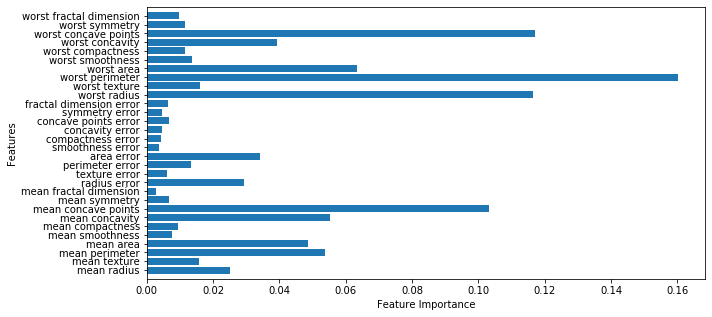

In [24]:
import numpy as np
def plot_feature_importances(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(10, 5))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.ylim(-1, n_features)
    plt.ylim(-1, n_features)
    
plot_feature_importances(forest)

랜덤포레스트에서는 단일 트리의 경우보다 훨씬 많은 특성이 0이상의 중요도 값을 갖는것을 확인할 수 있다.

랜덤포레스트도 'worst radius'특성이 매우 중요하다고 보지만, 가장 많은 정보를 가진 특성으로는 'worst perimeter'를 선택했다.

랜덤포레스트를 만드는 무작위성은 알고리즘이 가능성 있는 많은 경우를 고려할 수 있으므로, 그 결과 랜덤 포레스트가 단일 트리보다 더 넓은 시각으로 데이터를 바라볼 수 있다.

**장단점과 매개변수**

1. n_jobs로 사용할 코어 수를 지정할 수 있다. n_jobs=-1로 지정하면 컴퓨터의 모든 코어를 사용한다. default값은 1이다.
1. random_state 값을 지정한다면, 같은 결과를 나타낼 수 있다.
1. 랜덤포레스트는 텍스트 데이터와 같이 매우 차원이 높고, 희소한 데이터에는 잘 작동하지 않는다. 이런 데이터에는 선형 모델이 더 적합할 수 있다.
1. 랜덤포레스트는 매우 큰 데이터셋에도 잘 작동하며, 훈련은 여러 CPU코어로 간단히 병렬화할 수 있다. 하지만 선형모델보다 많은 메모리를 사용하며 훈련과 예측이 상대적으론 느리다.

**그래디언트 부스팅 회귀 트리**

1. 여러 개의 결정 트리를 묶어, 강력한 모델을 만드는 또다른 앙상블 방법. 이름이 회귀이지만 회귀와 분류 모두에 사용할 수 있다.
1. 랜덤포레스트와는 달리, 그래디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다. 
1. 기본적으로 그래디언트 부스팅 회귀 트리에는 무작위성이 없다. 대신 강력한 **사전 가지치기**가 사용된다.
1. 그래디언트 부스팅은 일반적으로 하나에서 다섯 정도의 깊지 않은 트리를 사용하므로 메모리를 적게 사용하고 예측도 빠르다. 
1. 그래디언트 부스팅의 근본적 아이디어는, 이런 얖은 트리 같은 간단한 모델(weak learner)을 많이 연결하는 것.
1. 각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어서 트리가 많이 추가될수록 성능이 좋아진다.
1. 중요 매개변수로, **learning_rate.** 이는 **이전 트리의 오차를 얼마나 강하게 보정**할 것인지 제어하는 것이다.

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Train Set Accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test Set Accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

Train Set Accuracy: 1.000
Test Set Accuracy: 0.965


위의 경우, 훈련세트가 100%정확도를 나타내는것으로 과적합.

In [27]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Train Set Accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test Set Accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

Train Set Accuracy: 0.991
Test Set Accuracy: 0.972


In [28]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Train Set Accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test Set Accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

Train Set Accuracy: 0.988
Test Set Accuracy: 0.965


위의 두 방식은, 모델의 복잡도를 감소시키므로 예상대로 훈련세트의 정확도가 낮아짐.
학습률을 낮추는 것은 테스트 세트의 성능을 높이지 못했으나, 트리의 최대 깊이를 낮추는 것은 모델 성능에 크게 기여함.

In [29]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

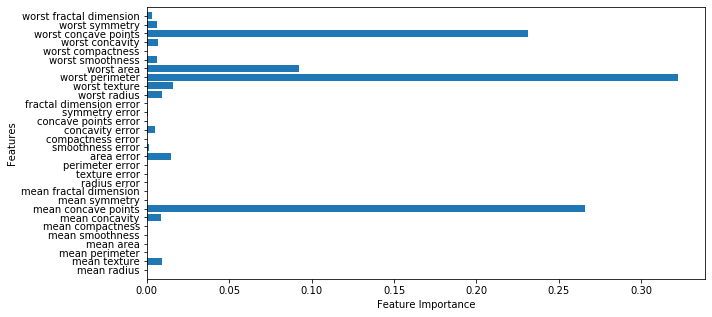

In [30]:
plot_feature_importances(gbrt)

랜덤포레스트와는 다르게, 몇가지 특성을 완전히 무시하고 있음.

비슷한 종류의 데이터에서 그래디언트 부스팅과 랜덤포레스트 둘 다 잘 작동하지만, 보통 더 안정적인 랜덤 포레스트를 먼저 작용하곤 한다. 랜덤 포레스트가 잘 작동하더라도 예측 시간이 중요하거나

머신러닝 모델에서 마지막 성능까지 쥐어짜야할 때 그래디언트 부스팅을 사용하면 도움이 된다. 

**장단점과 매개변수**

1. 가장 큰 단점은, 매개변수를 잘 조정해야하는것과 훈련 시간이 길다라는 것.
1. 다른 트리 기반 모델처럼 특성의 스케일을 조정하지 않아도 되고, 이진 특성이 연속적인 특성에서도 잘 동작.
1. 희소한 고차원 데이터에는 성능 저하.
1. n_estimators는 트리의 개수를 지정하는 것.
1. 이전 트리의 오차를 보정하는 것은 learning_rate.
1. n_estimators와 이전 트리의 오차를 보정하는 정도를 조절하는 learning_rate. 이 두 매개변수는 매우 깊게 연관되며 learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해서 더 많은 트리를 추가해야한다.
1. n_estimators를 크게 하면 모델이 복잡해지고 과대적합될 가능성이 높아진다. 일반적인 관례)는 n_estimators를 맞추고 나서 적절한 learning_rate을 찾는 것.